In [56]:
import numpy as np
import yfinance as yf
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [57]:
model1 = tf.keras.models.load_model("model1.keras", compile=False)
model1.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

model2 = tf.keras.models.load_model('model2.keras', compile=False)
model2.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

model3 = tf.keras.models.load_model('model3.keras', compile=False)
model3.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

In [58]:
ticker = yf.Ticker('aapl')

ticker_hist = ticker.history(period='max')
ticker_hist['Target'] = ticker_hist['Close'].shift(-1)
ticker_hist = ticker_hist.drop(ticker_hist.index[-1])
ticker_hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Target
Date,,,,,,,,
1980-12-12 00:00:00-05:00,0.099058,0.099488,0.099058,0.099058,469033600,0.0,0.0,0.093890
1980-12-15 00:00:00-05:00,0.094320,0.094320,0.093890,0.093890,175884800,0.0,0.0,0.086998
1980-12-16 00:00:00-05:00,0.087429,0.087429,0.086998,0.086998,105728000,0.0,0.0,0.089152
1980-12-17 00:00:00-05:00,0.089152,0.089582,0.089152,0.089152,86441600,0.0,0.0,0.091737
1980-12-18 00:00:00-05:00,0.091737,0.092167,0.091737,0.091737,73449600,0.0,0.0,0.097335
...,...,...,...,...,...,...,...,...
2024-07-26 00:00:00-04:00,218.699997,219.490005,216.009995,217.960007,41601300,0.0,0.0,218.240005
2024-07-29 00:00:00-04:00,216.960007,219.300003,215.750000,218.240005,36311800,0.0,0.0,218.800003
2024-07-30 00:00:00-04:00,219.190002,220.330002,216.119995,218.800003,41643800,0.0,0.0,222.080002


In [59]:
ticker_hist['Close_change'] = ticker_hist['Close'].diff().fillna(0)
ticker_hist['Open_change'] = ticker_hist['Open'].diff().fillna(0)
ticker_hist['30-day-ema'] = ticker_hist['Close'].ewm(30, adjust=False).mean()

ticker_hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Target,Close_change,Open_change,30-day-ema
Date,,,,,,,,,,,
1980-12-12 00:00:00-05:00,0.099058,0.099488,0.099058,0.099058,469033600,0.0,0.0,0.093890,0.000000,0.000000,0.099058
1980-12-15 00:00:00-05:00,0.094320,0.094320,0.093890,0.093890,175884800,0.0,0.0,0.086998,-0.005168,-0.004737,0.098891
1980-12-16 00:00:00-05:00,0.087429,0.087429,0.086998,0.086998,105728000,0.0,0.0,0.089152,-0.006891,-0.006891,0.098507
1980-12-17 00:00:00-05:00,0.089152,0.089582,0.089152,0.089152,86441600,0.0,0.0,0.091737,0.002153,0.001723,0.098206
1980-12-18 00:00:00-05:00,0.091737,0.092167,0.091737,0.091737,73449600,0.0,0.0,0.097335,0.002585,0.002585,0.097997
...,...,...,...,...,...,...,...,...,...,...,...
2024-07-26 00:00:00-04:00,218.699997,219.490005,216.009995,217.960007,41601300,0.0,0.0,218.240005,0.470001,-0.229996,207.976917
2024-07-29 00:00:00-04:00,216.960007,219.300003,215.750000,218.240005,36311800,0.0,0.0,218.800003,0.279999,-1.739990,208.307984
2024-07-30 00:00:00-04:00,219.190002,220.330002,216.119995,218.800003,41643800,0.0,0.0,222.080002,0.559998,2.229996,208.646437


In [60]:
feature1_scaler = MinMaxScaler((0,1))
feature2_scaler = MinMaxScaler((-1,1))
feature3_scaler = MinMaxScaler((-1,1))
target_scaler = MinMaxScaler((0,1))

ticker_hist['Scaled_ema'] = feature1_scaler.fit_transform(ticker_hist[['30-day-ema']])
ticker_hist['Scaled_close_change'] = feature2_scaler.fit_transform(ticker_hist[['Close_change']])
ticker_hist['Scaled_open_change'] = feature3_scaler.fit_transform(ticker_hist[['Open_change']])
ticker_hist['Scaled_target'] = target_scaler.fit_transform(ticker_hist[['Target']])

ticker_hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Target,Close_change,Open_change,30-day-ema,Scaled_ema,Scaled_close_change,Scaled_open_change,Scaled_target
Date,,,,,,,,,,,,,,,
1980-12-12 00:00:00-05:00,0.099058,0.099488,0.099058,0.099058,469033600,0.0,0.0,0.093890,0.000000,0.000000,0.099058,0.000251,-0.153663,-0.034920,0.000238
1980-12-15 00:00:00-05:00,0.094320,0.094320,0.093890,0.093890,175884800,0.0,0.0,0.086998,-0.005168,-0.004737,0.098891,0.000250,-0.154088,-0.035267,0.000209
1980-12-16 00:00:00-05:00,0.087429,0.087429,0.086998,0.086998,105728000,0.0,0.0,0.089152,-0.006891,-0.006891,0.098507,0.000248,-0.154230,-0.035425,0.000218
1980-12-17 00:00:00-05:00,0.089152,0.089582,0.089152,0.089152,86441600,0.0,0.0,0.091737,0.002153,0.001723,0.098206,0.000247,-0.153486,-0.034794,0.000229
1980-12-18 00:00:00-05:00,0.091737,0.092167,0.091737,0.091737,73449600,0.0,0.0,0.097335,0.002585,0.002585,0.097997,0.000246,-0.153450,-0.034730,0.000253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-26 00:00:00-04:00,218.699997,219.490005,216.009995,217.960007,41601300,0.0,0.0,218.240005,0.470001,-0.229996,207.976917,0.993301,-0.115016,-0.051776,0.929381
2024-07-29 00:00:00-04:00,216.960007,219.300003,215.750000,218.240005,36311800,0.0,0.0,218.800003,0.279999,-1.739990,208.307984,0.994883,-0.130639,-0.162444,0.931767
2024-07-30 00:00:00-04:00,219.190002,220.330002,216.119995,218.800003,41643800,0.0,0.0,222.080002,0.559998,2.229996,208.646437,0.996500,-0.107615,0.128517,0.945737


In [61]:
target = ticker_hist['Scaled_target']
features = ticker_hist[['Scaled_ema', 'Scaled_close_change', 'Scaled_open_change']]


In [62]:
split_point = int(len(features) * 0.8)

train = features[:split_point].values
train_targets = target[:split_point].values
val = features[split_point:].values
val_targets = target[split_point:].values

In [63]:
n_samples = train.shape[0] - 30
n_samples_test = val.shape[0] - 30
n_timesteps = 30
n_features = train.shape[1]

train_reshaped = np.zeros((n_samples, n_timesteps, n_features))
train_targets_reshaped = np.zeros((n_samples, 1))
val_reshaped = np.zeros((n_samples_test, n_timesteps, n_features))
val_targets_reshaped = np.zeros((n_samples_test, 1))

for i in range(n_samples):
    train_reshaped[i] = train[i:i+n_timesteps]
    train_targets_reshaped[i] = train_targets[i+n_timesteps]

for i in range(n_samples_test):
    val_reshaped[i] = val[i:i+n_timesteps]
    val_targets_reshaped[i] = val_targets[i+n_timesteps]

In [64]:
train_targets_reshaped.shape

(8770, 1)

In [65]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15)
model1_checkpoint = tf.keras.callbacks.ModelCheckpoint("model1.keras", save_best_only=True)
model2_checkpoint = tf.keras.callbacks.ModelCheckpoint("model2.keras", save_best_only=True)
model3_checkpoint = tf.keras.callbacks.ModelCheckpoint("model3.keras", save_best_only=True)
ensemble_checkpoint = tf.keras.callbacks.ModelCheckpoint("ensemble.keras", save_best_only=True)

checkpoints = [model1_checkpoint, model2_checkpoint, model3_checkpoint]


In [66]:
model1.fit(train_reshaped, train_targets_reshaped, batch_size=30, epochs=50, callbacks=[early_stop, model1_checkpoint], validation_data=(val_reshaped, val_targets_reshaped))
model2.fit(train_reshaped, train_targets_reshaped, batch_size=30, epochs=50, callbacks=[early_stop, model2_checkpoint], validation_data=(val_reshaped, val_targets_reshaped))
model3.fit(train_reshaped, train_targets_reshaped, batch_size=30, epochs=50, callbacks=[early_stop, model3_checkpoint], validation_data=(val_reshaped, val_targets_reshaped))

Epoch 1/50
293/293 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - loss: 8.7917e-04 - mean_absolute_error: 0.0207 - val_loss: 0.0015 - val_mean_absolute_error: 0.0267
Epoch 2/50
293/293 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - loss: 5.2795e-05 - mean_absolute_error: 0.0050 - val_loss: 0.0022 - val_mean_absolute_error: 0.0315
Epoch 3/50
293/293 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 2.3425e-05 - mean_absolute_error: 0.0034 - val_loss: 0.0040 - val_mean_absolute_error: 0.0474
Epoch 4/50
293/293 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - loss: 1.6058e-05 - mean_absolute_error: 0.0028 - val_loss: 0.0046 - val_mean_absolute_error: 0.0505
Epoch 5/50
293/293 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - loss: 1.4092e-05 - mean_absolute_error: 0.0026 - val_loss: 0.0026 - val_mean_absolute_error: 0.0361
Epoch 6/50
293/293 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - loss: 1.1624e-05 - mean_absolute_error: 0.0023 - val_loss: 0.0011 - val_mean_absolute_error: 0.0220
Epoch 7/50
293/293 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - loss: 1.0780e-

In [67]:
ensemble_input = tf.keras.layers.Input(shape=(30,3))
output1 = model1(ensemble_input)
output2 = model2(ensemble_input)
output3 = model3(ensemble_input)

ensemble_output = tf.keras.layers.Average()([output1, output2, output3])

ensemble_model = tf.keras.Model(inputs=ensemble_input, outputs=ensemble_output)
ensemble_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

In [68]:
predictions = ensemble_model.predict(val_reshaped, batch_size=30)

73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step


In [69]:
predictions = target_scaler.inverse_transform(predictions)
unscaled_targets = target_scaler.inverse_transform(val_targets_reshaped)

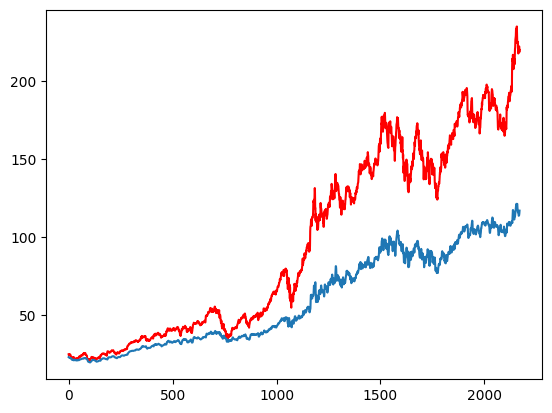

In [70]:
plt.plot(unscaled_targets, color='red')
plt.plot(predictions)